<a href="https://colab.research.google.com/github/roshanappa/Time-Series-Analysis-Projects-/blob/master/Time_Series_Analysis_With_The_Help_Of_FbProphet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [78]:
data = pd.read_csv('/content/monthly-milk-production-pounds.csv',nrows=168)

In [79]:
data.head()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
0,1962-01,589
1,1962-02,561
2,1962-03,640
3,1962-04,656
4,1962-05,727


In [80]:
data.tail()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
163,1975-08,858
164,1975-09,817
165,1975-10,827
166,1975-11,797
167,1975-12,843


In [81]:
data.columns = ['Date','Milk_Production']

In [83]:
data.columns

Index(['Date', 'Milk_Production'], dtype='object')

In [54]:
data['Date'] = pd.to_datetime(data['Date'],format="%Y-%m")

In [84]:
data.dtypes

Date               object
Milk_Production     int64
dtype: object

In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Date             168 non-null    object
 1   Milk_Production  168 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.8+ KB


In [86]:
round(data.describe(),1)

,Milk_Production
count,168.0
mean,754.7
std,102.2
min,553.0
25%,677.8
50%,761.0
75%,824.5
max,969.0


In [87]:
data.isnull().sum()

Date               0
Milk_Production    0
dtype: int64

# Data Visualization and Preprocessing.

In [88]:
data.set_index('Date',inplace=True)

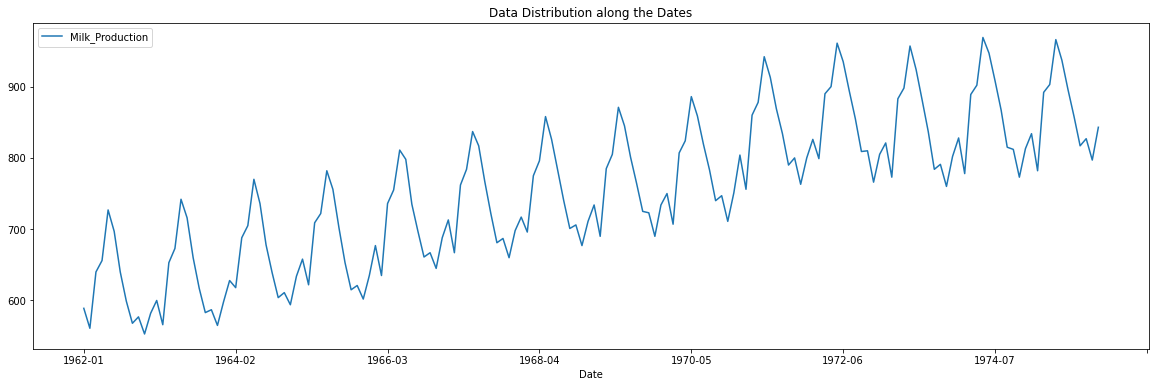

In [89]:
data.plot(figsize=(20,6),title='Data Distribution along the Dates')
plt.show()

In [91]:
data.reset_index(inplace=True)
fig = px.line(data, x='Date', y='Milk_Production', title='Milk Production with timePeriod')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1year", step="year", stepmode="backward"),
            dict(count=2, label="2year", step="year", stepmode="backward"),
            dict(count=3, label="3year", step="year", stepmode="backward"),
            dict(count=4, label="4year", step="year", stepmode="backward"),
            dict(count=5, label="5year", step="year", stepmode="backward"),
            dict(count=6, label="6year", step="year", stepmode="backward"),
            dict(count=7, label="7year", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()

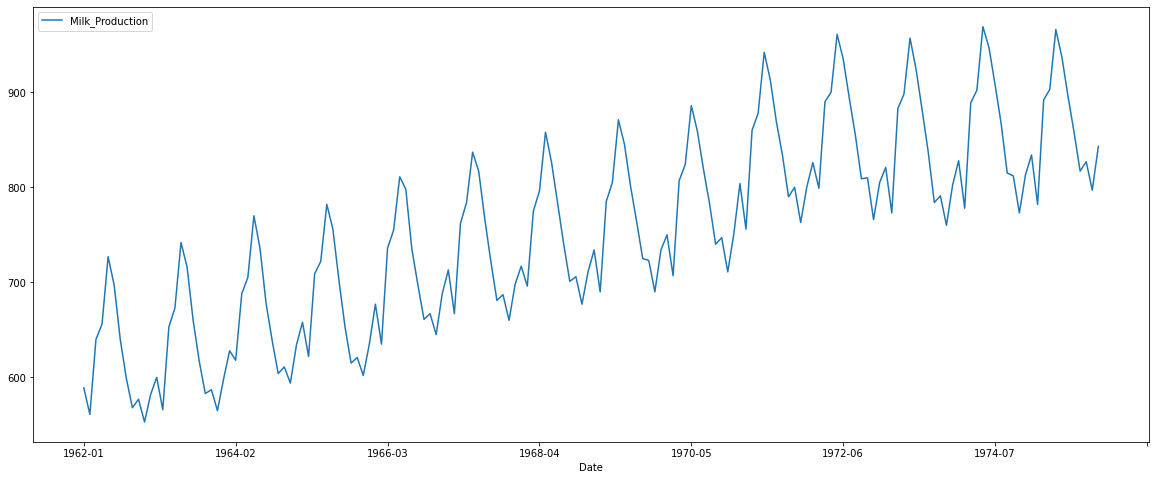

In [92]:
data.set_index('Date',inplace=True)
data.plot(figsize=(20,8))
plt.show()

We can see some relationship inbetween the temp and demand and precip.

## Null values Handeling.

In [93]:
print(data.isnull().any())

Milk_Production    False
dtype: bool


We can do many things in data visualization in time Series analysis.But the time being we are focusing on the Model building.

**It is about the auto-arima**

  We can use the AIC or BIC metric .It is relate the diffrence between unknown true likely and fitted likelyhood.

We have given the stepwise True it will step wise select the each parameter as gridsearch way.

AIC is the relative diffrence between them.Low AIC means the model is good model.

http://alkaline-ml.com/pmdarima/auto_examples/index.html

In [101]:
data.reset_index(inplace=True)

In [102]:
data.columns=['ds','y']

In [105]:
train_data = data[:100]
test_data  = data[100:]

In [94]:
import fbprophet

In [95]:
from fbprophet import Prophet

In [96]:
model = Prophet(yearly_seasonality=True,interval_width=0.95)

In [106]:
model.fit(train_data)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [108]:
y_predict=model.predict(test_data)

In [109]:
y_predict.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'yearly', 'yearly_lower', 'yearly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')

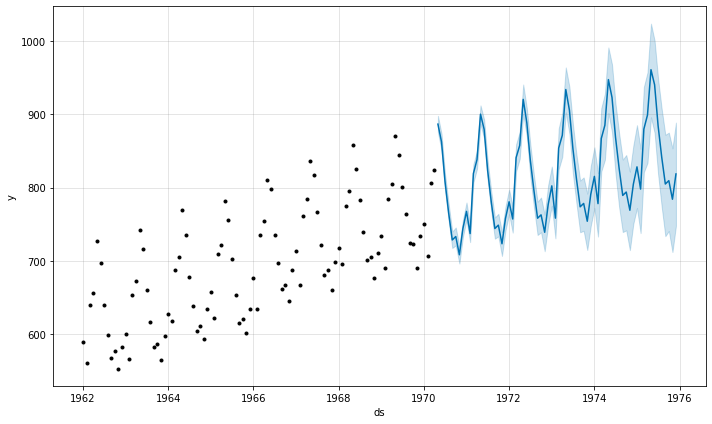

In [149]:
model.plot(y_predict)
plt.show()

In [110]:
y_predict[['ds','yhat_lower','yhat_upper','yhat']].head()

,ds,yhat_lower,yhat_upper,yhat
0,1970-05-01,875.823435,898.163889,886.801450
1,1970-06-01,850.775808,873.609207,862.415801
2,1970-07-01,796.579809,818.949273,808.106464
3,1970-08-01,755.005655,777.929713,765.572356
4,1970-09-01,717.655625,739.946663,728.662872


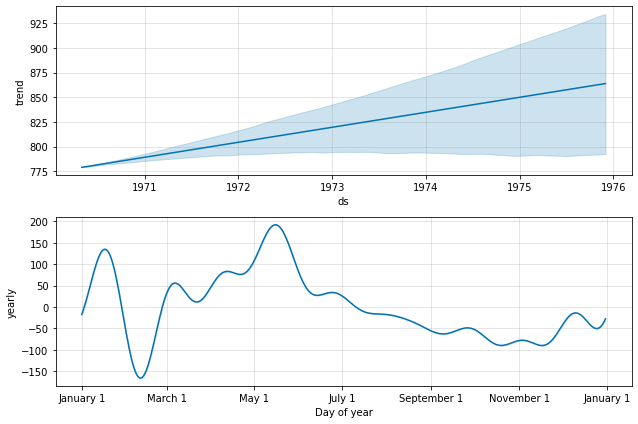

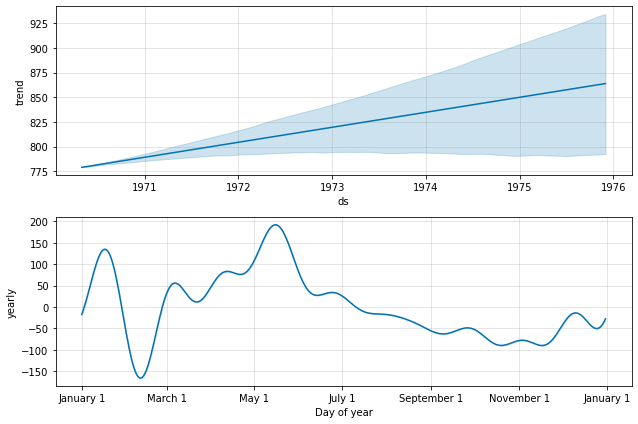

In [111]:
model.plot_components(y_predict)

In [112]:
from fbprophet.diagnostics import cross_validation

In [120]:
cv = cross_validation(model=model,horizon='365 days',initial='1095 days')

INFO:fbprophet:Making 9 forecasts with cutoffs between 1965-04-02 00:00:00 and 1969-04-01 00:00:00


In [121]:
cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1965-05-01,793.593150,787.790365,799.379767,782,1965-04-02
1,1965-06-01,762.069334,756.003927,767.766041,756,1965-04-02
2,1965-07-01,704.678133,698.275901,710.766707,702,1965-04-02
3,1965-08-01,664.366181,657.954626,670.981059,653,1965-04-02
4,1965-09-01,630.382191,623.314427,637.251155,615,1965-04-02


In [122]:
from fbprophet.diagnostics import performance_metrics

In [124]:
matrix = performance_metrics(cv)
matrix.head()
#Chack the rmse is constant or not.

,horizon,mse,rmse,mae,mape,mdape,coverage
0,31 days 12:00:00,51.850621,7.200738,5.827264,0.007877,0.007135,0.800000
1,60 days 00:00:00,81.535536,9.029703,7.167787,0.009523,0.009873,0.633333
2,60 days 12:00:00,72.999413,8.543969,6.754658,0.009254,0.007811,0.700000
3,61 days 00:00:00,66.661105,8.164625,6.349905,0.008394,0.005639,0.700000
4,61 days 12:00:00,67.506736,8.216248,6.520380,0.008563,0.007030,0.700000


In [143]:
dataframe=pd.concat([test_data.reset_index()['y'],y_predict['yhat']],axis=1)
dataframe.head()

,y,yhat
0,886,886.801450
1,859,862.415801
2,819,808.106464
3,783,765.572356
4,740,728.662872


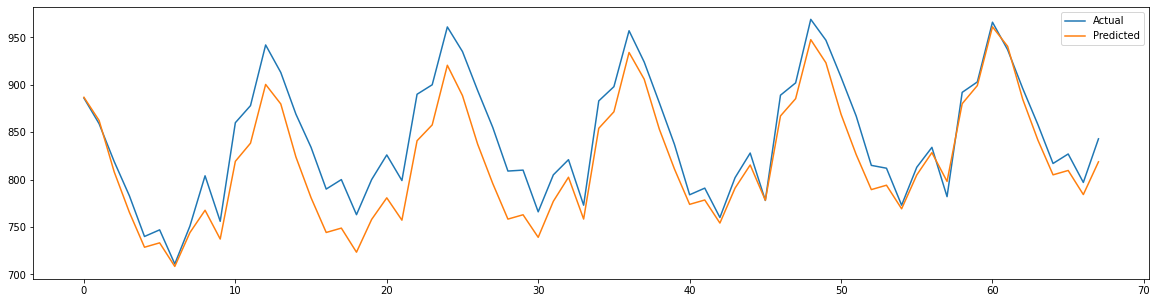

In [147]:
dataframe.plot(figsize=(20,5))
plt.legend(['Actual','Predicted'])
plt.show()

## Predict the future dates:-

In this ,I will predict the all data as an input.let's see.

In [150]:
from fbprophet import Prophet
from fbprophet.diagnostics import cross_validation,performance_metrics

In [151]:
model = Prophet(yearly_seasonality=True,interval_width=0.95)

In [152]:
model.fit(data)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [153]:
y_forecast = model.predict(data)

In [156]:
y_forecast[['ds','yhat_lower','yhat_upper','yhat']].head()

,ds,yhat_lower,yhat_upper,yhat
0,1962-01-01,573.013049,602.662086,586.774860
1,1962-02-01,530.745908,561.548843,546.014381
2,1962-03-01,625.651205,655.746372,641.565665
3,1962-04-01,642.269979,672.509509,658.582860
4,1962-05-01,706.312081,736.601112,721.564225


In [158]:
daatframe = pd.DataFrame(dict(Actual=data['y'],Predicted=y_forecast['yhat']))
dataframe.head()

,y,yhat
0,886,886.801450
1,859,862.415801
2,819,808.106464
3,783,765.572356
4,740,728.662872


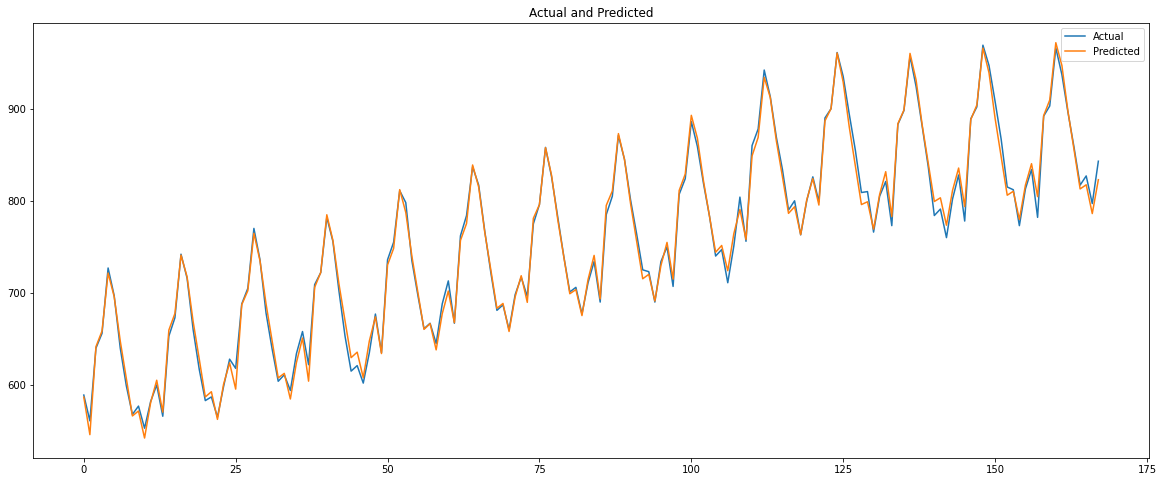

In [160]:
daatframe.plot(figsize=(20,8),title='Actual and Predicted')
plt.show()

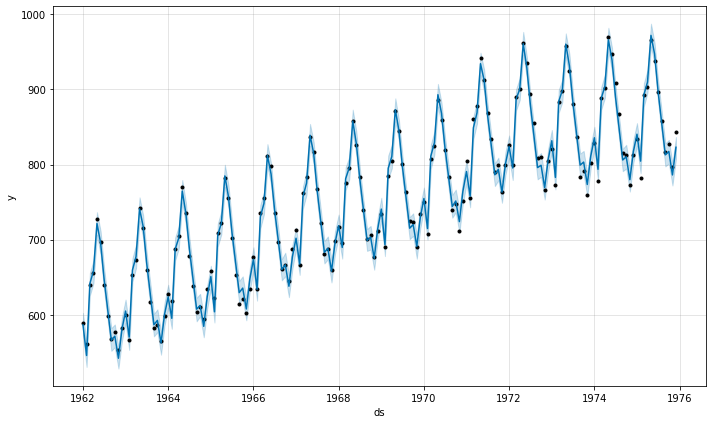

In [162]:
model.plot(y_forecast)
plt.show()

In [164]:
future_dates = model.make_future_dataframe(730)

In [165]:
future_dates.head()

,ds
0,1962-01-01
1,1962-02-01
2,1962-03-01
3,1962-04-01
4,1962-05-01


In [166]:
future_dates.tail()

,ds
893,1977-11-26
894,1977-11-27
895,1977-11-28
896,1977-11-29
897,1977-11-30


In [167]:
future_prediction = model.predict(future_dates)

In [169]:
future_prediction[['ds','yhat_lower','yhat_upper','yhat']].head()

,ds,yhat_lower,yhat_upper,yhat
0,1962-01-01,571.491848,602.049485,586.774860
1,1962-02-01,531.988436,560.505475,546.014381
2,1962-03-01,627.294658,656.374240,641.565665
3,1962-04-01,644.034516,674.308680,658.582860
4,1962-05-01,706.648035,737.017833,721.564225


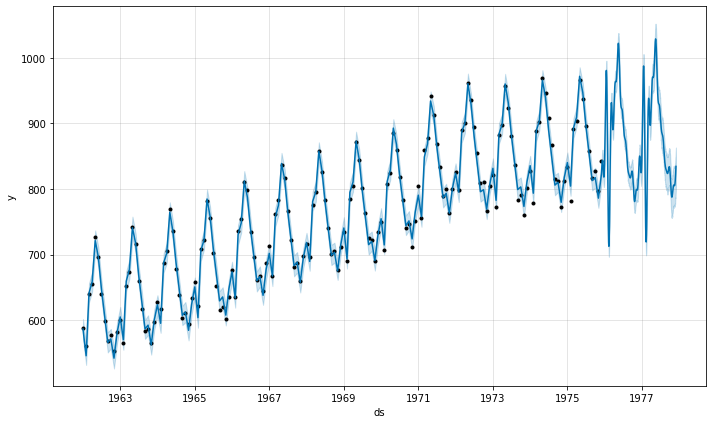

In [172]:
model.plot(future_prediction)
plt.show()

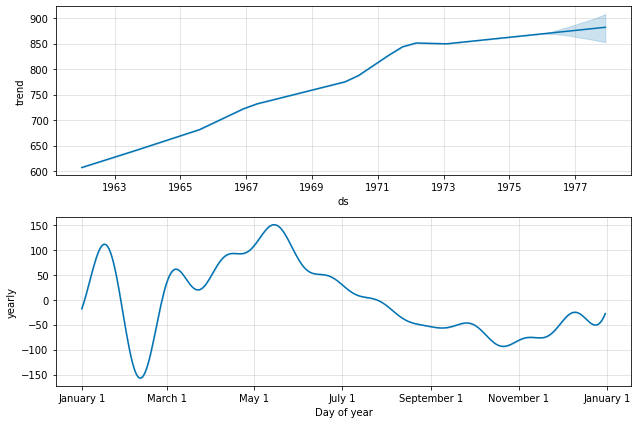

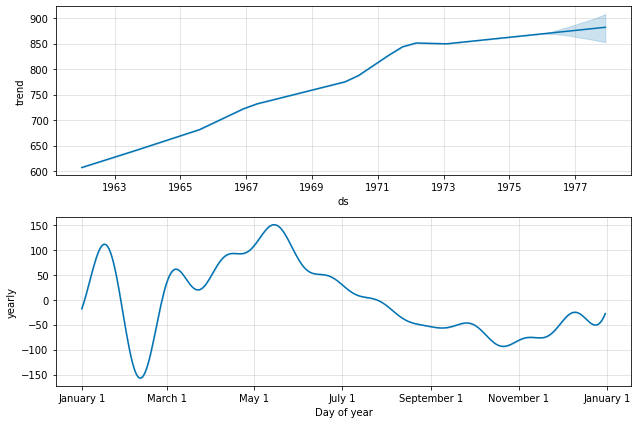

In [173]:
model_components = model.plot_components(future_prediction)
model_components 

In the above we can see there is gradual increment in the yearwsie,but in the monthwsie production of milk production is lowest in july,december then again it increases.


If we have good bussiness idea that time we can add the changepoint so that we can undestand the at point the sudden fluctuations happened.

In [174]:
from fbprophet.plot import add_changepoints_to_plot

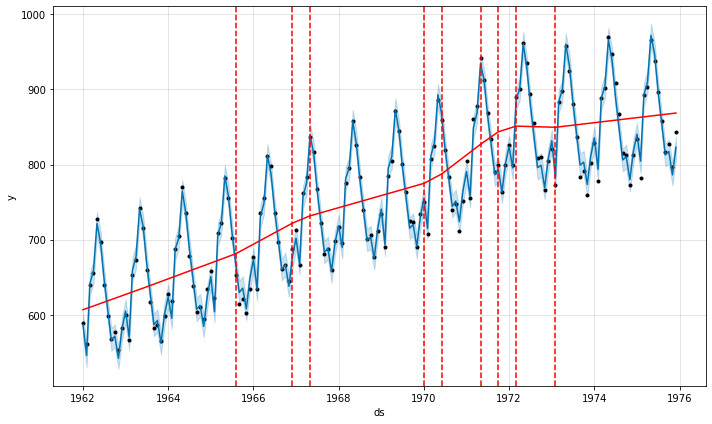

In [175]:
fig = model.plot(y_forecast)
a = add_changepoints_to_plot(fig.gca(),model,y_forecast)
#It take the 80% of data 

We will see that changepoints are the possitive cangepoints or negetive changepoints.

In [176]:
deltas = model.params['delta'].mean(0)
deltas

array([ 8.98209431e-09,  5.53619097e-07,  9.33222470e-03,  1.31842624e-03,
       -1.10347424e-10, -2.34103117e-09,  1.69379779e-08,  1.37176277e-01,
        1.57570062e-09,  1.30161694e-08, -1.02697725e-01, -1.04842628e-01,
       -5.64645987e-08,  3.70109381e-09,  2.46892899e-08,  3.45480234e-09,
       -5.62702615e-10,  2.00679815e-01,  1.88496669e-01, -1.46829398e-09,
       -5.09604699e-02, -3.10754420e-01, -2.83032599e-01, -3.88090231e-09,
        1.19802240e-01])

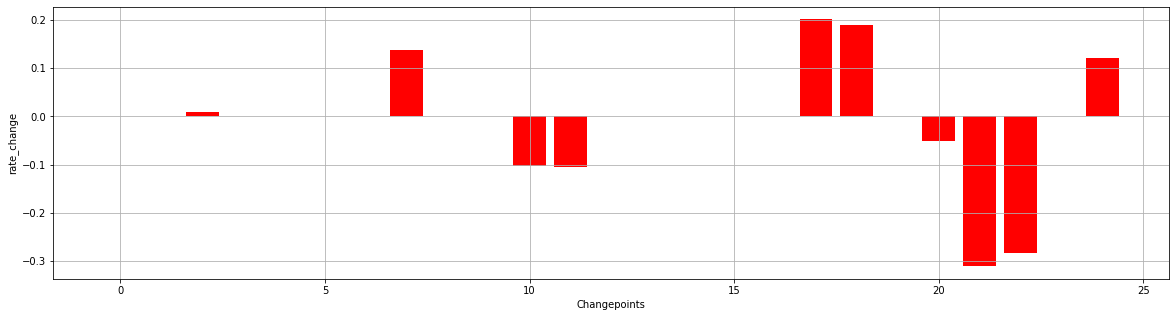

In [186]:
plt.figure(figsize=(20,5))
plt.bar(range(len(deltas)),deltas,color='r')
plt.xlabel('Changepoints')
plt.ylabel('rate_change')
plt.grid()
plt.show()

In [187]:
from fbprophet.plot import plot_plotly
import plotly.offline as py 

In [188]:
fig = plot_plotly(model,y_forecast)
py.iplot(fig)

In [190]:
df_cv = cross_validation(model=model,horizon='365 days',initial='1095 days')

INFO:fbprophet:Making 20 forecasts with cutoffs between 1965-06-03 12:00:00 and 1974-12-01 00:00:00


In [191]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1965-07-01,695.455298,691.684319,699.078255,702,1965-06-03 12:00:00
1,1965-08-01,654.030145,649.050014,659.148064,653,1965-06-03 12:00:00
2,1965-09-01,619.021577,611.924372,627.379332,615,1965-06-03 12:00:00
3,1965-10-01,625.553378,614.032511,637.537959,621,1965-06-03 12:00:00
4,1965-11-01,607.333830,592.403990,623.469302,602,1965-06-03 12:00:00


In [192]:
from fbprophet.diagnostics import performance_metrics

In [194]:
matrix = performance_metrics(df_cv)
matrix.head(10)

,horizon,mse,rmse,mae,mape,mdape,coverage
0,59 days 12:00:00,275.058385,16.584884,13.371935,0.016774,0.015603,0.458333
1,60 days 00:00:00,284.384003,16.863689,13.398496,0.017295,0.013700,0.468750
2,60 days 12:00:00,312.859938,17.687847,13.974830,0.017700,0.014194,0.472222
3,61 days 00:00:00,291.352504,17.069051,13.736088,0.017827,0.015746,0.416667
4,62 days 00:00:00,375.626234,19.381079,15.373395,0.019958,0.017705,0.354167
5,88 days 00:00:00,375.299032,19.372636,15.666901,0.020489,0.017346,0.305556
6,89 days 00:00:00,377.545126,19.430520,16.344055,0.021244,0.018556,0.208333
7,89 days 12:00:00,354.320372,18.823400,15.442747,0.020247,0.015746,0.250000
8,90 days 00:00:00,357.333085,18.903256,14.893760,0.018982,0.014564,0.347222
9,90 days 12:00:00,328.090058,18.113256,14.507901,0.018741,0.014564,0.291667


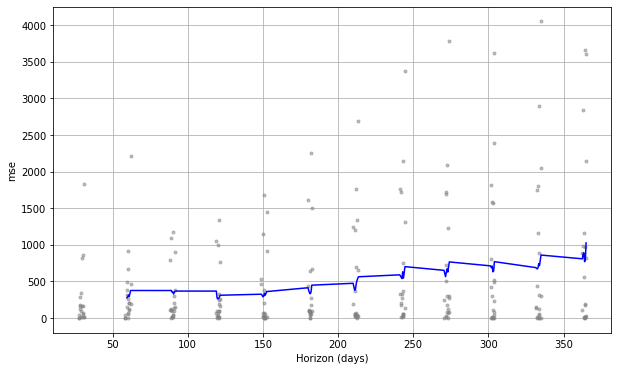

In [195]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mse')

This is how we can handel seasonal time series very easily with Fbprophet liberary.

This is help use to predict the seasonal daata without making it stationary.We can easily predict the outliers by doing this ..futher information ..

https://facebook.github.io/prophet/


## Thank You !!